# GUC K-nearest neighbor Classification

### Import packages and data set
#### Import the "Classified data" file 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [12]:
data=pd.read_csv("Classified Data.csv")

In [13]:
data.head(2)

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0


### Scale the features using sklearn.preprocessing package

**Instantiate a scaler standardizing estimator**

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**Fit the features data only to this estimator (leaving the TARGET CLASS column) and transform**

In [17]:
scaler.fit(data.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(data.drop('TARGET CLASS',axis=1))

In [19]:
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split, model fit and prediction

In [55]:
from sklearn.model_selection import train_test_split
X = df_feat
y = data['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['TARGET CLASS'],
                                                    test_size=0.50, random_state=101)
print(X_train.shape)

(500, 10)


In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [23]:
pred = knn.predict(X_test)

### Evaluation of classification quality using Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)
print(cm[][])

[[233  17]
 [ 24 226]]


***Print Misclassification error rate***

In [50]:
from sklearn import metrics
print("Accuracy for test data:",str(metrics.accuracy_score(y_test, pred)*100)+"%" )
row1=((cm[0][1])/(cm[0][0]+cm[0][1]))*100
row2=((cm[1][0])/(cm[1][0]+cm[1][1]))*100
print("Misclassification error rate for label 0: "+str(row1)+"%")
print("Misclassification error rate for label 1: "+str(row2)+"%")

Accuracy for test data: 91.8%
Misclassification error rate for label 0: 6.800000000000001%
Misclassification error rate for label 1: 9.6%


# Choosing 'k' using cross validation error
#### Plot the error rate vs. K Value

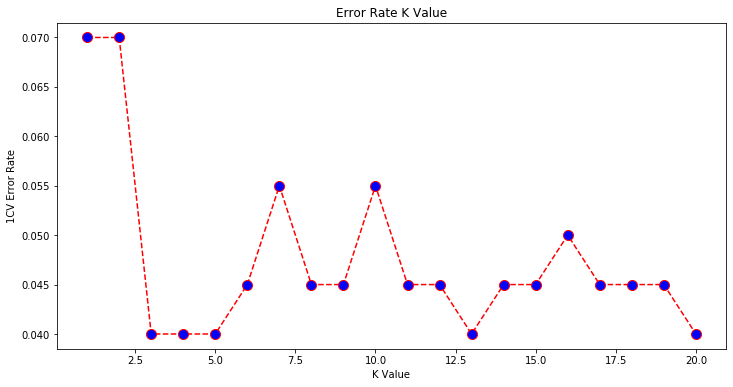

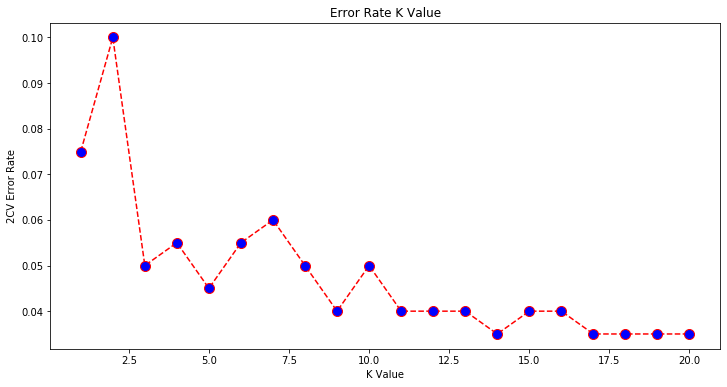

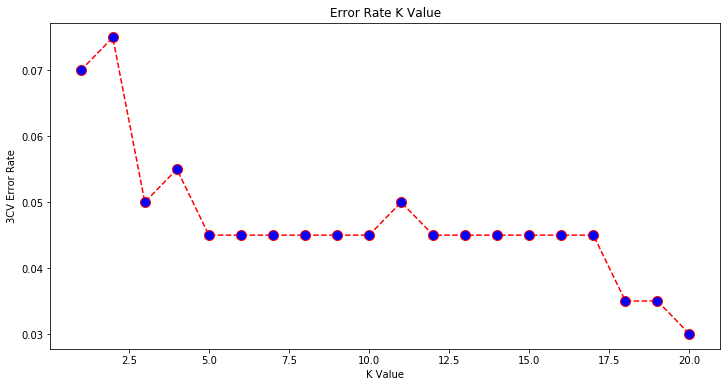

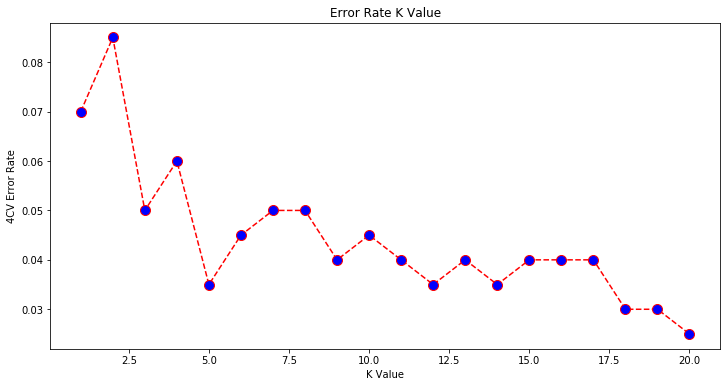

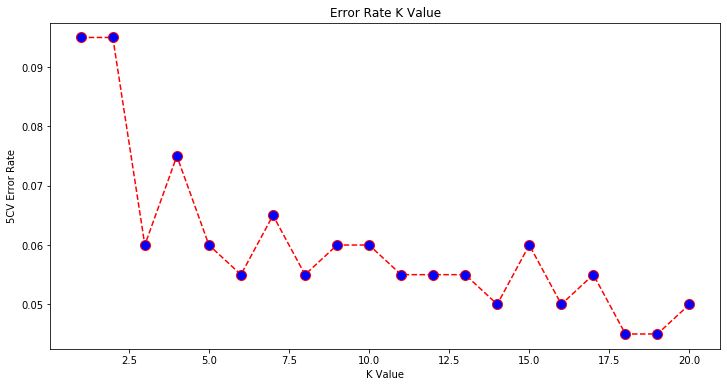

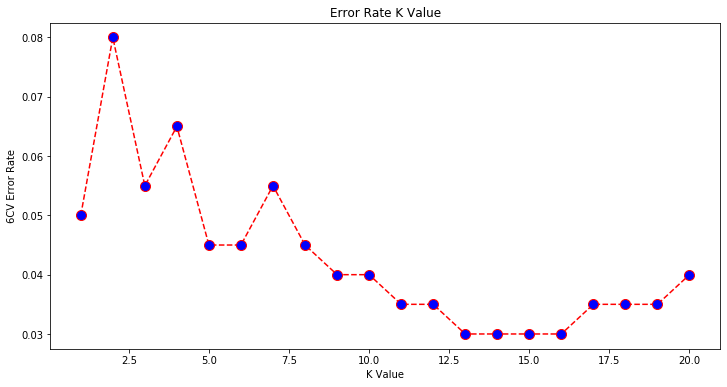

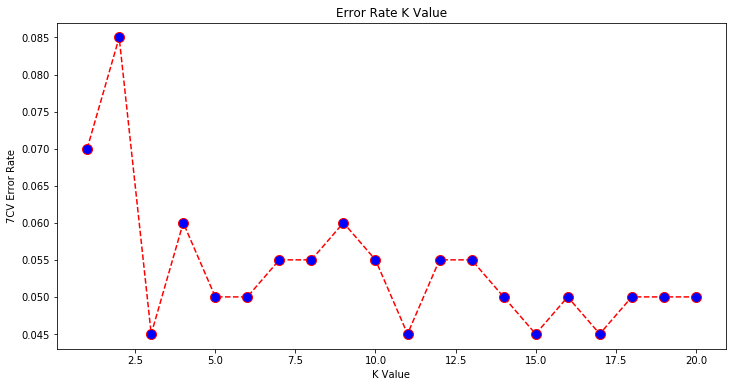

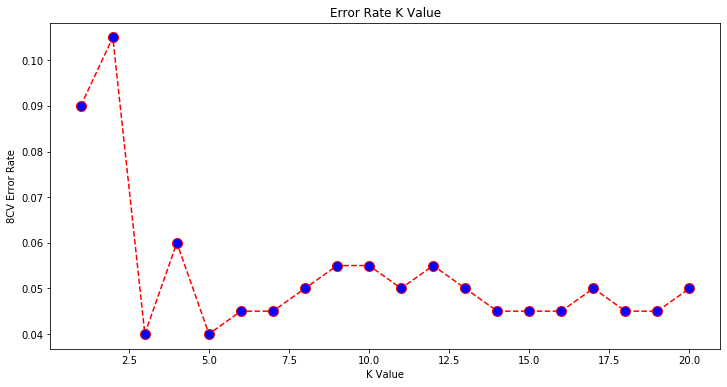

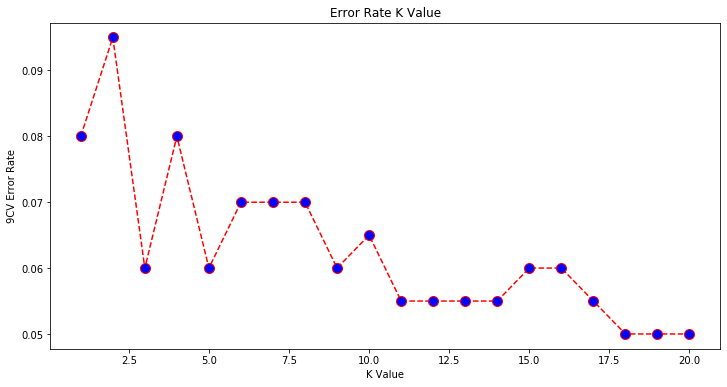

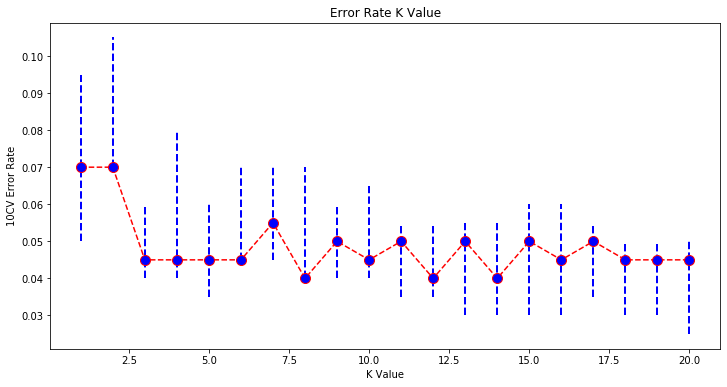

In [102]:
#60% Train Data, 20% CV Data, 20% Test Data
j=0
Min=np.ones(20)
Max=np.zeros(20)
while j<10:
    XTrainData, XRemain, YTrainData, YRemain = train_test_split(scaled_features,data['TARGET CLASS'],
                                                    test_size=0.40, random_state=101)
    XCV, XTestData, YCV, YTestData = train_test_split(XRemain,YRemain, test_size=0.5)
    j+=1
    
    graph()
#print(Min)
#print(Max)

In [101]:
def graph():
    
    # Calculating error for K values between 1 and 20
    error = []
    for i in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(XTrainData,YTrainData)
        pred_i = knn.predict(XCV)
        error.append(np.mean(pred_i != YCV))
        if error[i-1]<Min[i-1]:
            #print(Min[i-1])
            #print(error[0])
            Min[i-1]=error[i-1]
        if error[i-1]>Max[i-1]:
            Max[i-1]=error[i-1]
    #print(error)
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    # multiple lines with varying ymin and ymax
    if j==10:
        
        plt.vlines(x=list(range(1, 21)), ymin=Min, ymax=Max, colors='blue', ls='--', lw=2, label='vline_multiple - partial height')
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel(str(j)+'CV Error Rate')